In [29]:
from models.Parser import Parser
from models.Local_Database import Local_Database
from models.config import cleaning_methods, filter_methods
from dotenv import dotenv_values
import pandas as pd
import re
import seaborn as sns
from functools import cache
import numpy as np
import os
pd.set_option('display.max_rows', 10)
def export_df(df, file_path):
    df.to_csv(f"{file_path}_df.csv", mode="w", encoding="utf-8")

In [30]:
configuration = dotenv_values(".env")



Python-dotenv could not parse statement starting at line 24


In [31]:
p = Parser()

Python-dotenv could not parse statement starting at line 24


In [32]:
print(os.getcwd())


c:\Users\mikaw\pyproj\Resume_Optimization_Tool\dev


In [33]:
p.load_from_backup(".\\data\\output_files\\db\\")
p.db.keys()

Imported applicant from .\data\output_files\db\applicant_df.csv.
Contents:
   Unnamed: 0                     date update_type      PostID  \
0           0  2022-09-09 01:04:36 UTC   applicant  3183794383   
1           1  2022-09-09 01:10:37 UTC   applicant  3172677327   
2           2  2022-09-09 22:30:43 UTC   applicant  3254118672   
3           3  2022-09-07 23:43:15 UTC   applicant  3243309366   
4           4  2022-09-09 22:28:42 UTC   applicant  3199936269   

                                              url  \
0  https://www.linkedin.com/jobs/view/3183794383/   
1  https://www.linkedin.com/jobs/view/3172677327/   
2  https://www.linkedin.com/jobs/view/3254118672/   
3  https://www.linkedin.com/jobs/view/3243309366/   
4  https://www.linkedin.com/jobs/view/3199936269/   

                                               title  \
0                 Automation Engineer at ACL Digital   
1  Automation Engineer at The Raymond Newell Grou...   
2                       Back End Develope

dict_keys(['applicant', 'companies', 'rejected', 'viewed'])

In [34]:

applicants = p.db['applicant']
companies = p.db['companies']
rejected = p.db['rejected']
viewed = p.db['viewed']

applicants['company']=applicants['company'].str.strip(".")
rejected['company']=rejected['company'].str.strip(".")
viewed['company']=viewed['company'].str.strip(".")

companies['Company_Name']=companies['Company_Name'].str.title()
applicants['company']=applicants['company'].str.title()
rejected['company']=rejected['company'].str.title()
viewed['company']=viewed['company'].str.title()

In [35]:
# companies[companies['Company_Name'].isna()]
def extract_domain(s):
    filter =re.compile(r'https?://w{0,3}\.?(([A-Za-z0-9-]+\.?)+[A-Za-z0-9-]+\.?)')
    results = re.search(filter, s)
    if results:
        results = results.group(1)
    return results
# extract_domain = lambda x: re.search(re.compile(r'https?://www\.[A-Za-z0-9-]+\.[A-Za-z0-9-]+'),x)
companies['company_domain']=companies[['Company_Website']].applymap(extract_domain, na_action='ignore')
companies[['Company_Name', 'Company_Website', 'company_domain']]
# unique_companies = companies['company_domain'].unique()
unique_companies = companies['Company_Name'].unique()
print(unique_companies)

chunk_companies = lambda n: [list(unique_companies[i:min(i+n,int(len(unique_companies)-1)//(n+1))]) for i in range(0,len(unique_companies)//n,n+1)]
results = chunk_companies(15)
print(results)
# email_filter_results = ["from:\""+r'|"'.join(["@"+str(ite).split(".")[0] + ".\"" for ite in item if str(ite)!="nan"]) + " -\"jobalerts-noreply@linkedin.com\" -\"jobs-listings@linkedin.com\" -\"jobs-noreply@linkedin.com\"" for item in results]
email_filter_results = ["\""+r'|"'.join([str(ite) + "\"" for ite in item if str(ite)!="nan"]) + " -\"jobalerts-noreply@linkedin.com\" -\"jobs-listings@linkedin.com\" -\"jobs-noreply@linkedin.com\" -\"jobalerts@cybercoders.com\" -\"jobalerts@\" -from:me" for item in results]
# email_filter_results = ["\""+r'|"'.join([str(ite).split(".")[0] + "\"" for ite in item if str(ite)!="nan"]) + " -\"jobalerts-noreply@linkedin.com\" -\"jobs-listings@linkedin.com\" -\"jobs-noreply@linkedin.com\"" for item in results]
# .split(".")[0]
for item in email_filter_results:
    print(len(item))
print(*email_filter_results, sep="\n")

['Acl Digital' 'The Raymond Newell Group, Inc.' 'Eclaro' 'Cybercoders'
 'Cypress Hcm' 'The Judge Group' 'Thentic' nan 'Optimal Engineering, Inc.'
 'Jcw' 'Blend360' 'Tusimple' 'Addison Group' 'Harnham' 'Scout Clinical'
 'The Sage Group (Bay Area)' 'Yoh, A Day & Zimmermann Company'
 'Femtotex Llc' 'Cornerstone Building Brands' 'Perq' 'Brillio'
 'Aditi Consulting' 'Gordian' 'American Homes 4 Rent'
 'Blue Orange Digital' 'Agility Partners' 'Agreeya Solutions'
 'Bayone Solutions' 'Brooksource' 'Care Solace' 'Coders Data' 'Compugain'
 'Confidential' 'Datassential' 'Fēnom Digital' 'Givebutter' 'Idr, Inc.'
 'Imperium Data' 'Insight Global' 'Integrated Healthcare Association'
 'Intellicept Inc' 'Kismet Search' 'Lhh' 'Lumanity' 'Manpowergroup'
 'Mastermind.Com' 'Mediakind' 'Milestone Technologies, Inc.' 'Mindsource'
 'Modis' 'Motion Recruitment' 'Omtech' 'Optomi' 'Payrhealth'
 'Proarch Consulting Services Private Limited' 'Rangam'
 'Revolution Technologies' 'Sgs Consulting' 'Storm2' 'Syllogistek

In [36]:

#Trying to create email filter queries
def chunkify_list(my_list, n):
    suffix = " -\"jobalerts-noreply@linkedin.com\" -\"jobs-listings@linkedin.com\" -\"jobs-noreply@linkedin.com\" -\"jobalerts@cybercoders.com\" -\"jobalerts@\" -from:me" 
    
    common_words = ["The", "Inc", "LLC", "Solutions", "Partners?", r"\sa\s", "\san\s"]
    common_words = [f"\s?{item}\s?" for item in common_words]
    pattern=re.compile(r"|".join(common_words),re.IGNORECASE)
    remove_common = lambda s: pattern.sub(" ",s).lstrip().rstrip()
    
    str_fix = lambda x: r"|".join(x).replace('.','').replace(',','')
    
    my_list = ["\""+remove_common(str(item))+"\"" for item in my_list if str(item).lower()!="nan"]
    chunks = [my_list[(i+n*i):min(n*(i+1),len(my_list)-1)] for i in range(0,len(my_list)//n+1)]
    results = [str_fix(item)+suffix for item in chunks]
    return results

In [37]:
print(*chunkify_list(unique_companies, 20), sep="\n\n\n")

"Acl Digital"|"Raymond Newell Group "|"Eclaro"|"Cybercoders"|"Cypress Hcm"|"Judge Group"|"ntic"|"Optimal Engineering "|"Jcw"|"Blend360"|"Tusimple"|"Addison Group"|"Harnham"|"Scout Clinical"|"Sage Group (Bay Area)"|"Yoh Day & Zimmermann Company"|"Femtotex"|"Cornerstone Building Brands"|"Perq"|"Brillio" -"jobalerts-noreply@linkedin.com" -"jobs-listings@linkedin.com" -"jobs-noreply@linkedin.com" -"jobalerts@cybercoders.com" -"jobalerts@" -from:me


"Gordian"|"American Homes 4 Rent"|"Blue Orange Digital"|"Agility"|"Agreeya"|"Bayone"|"Brooksource"|"Care Solace"|"Coders Data"|"Compugain"|"Confidential"|"Datassential"|"Fēnom Digital"|"Givebutter"|"Idr "|"Imperium Data"|"Insight Global"|"Integrated Healthcare Association"|"Intellicept" -"jobalerts-noreply@linkedin.com" -"jobs-listings@linkedin.com" -"jobs-noreply@linkedin.com" -"jobalerts@cybercoders.com" -"jobalerts@" -from:me


"Lumanity"|"Manpowergroup"|"MastermindCom"|"Mediakind"|"Milestone Technologies "|"Mindsource"|"Modis"|"Motion Recru

In [38]:
Post_Company_Bridge = applicants[['PostID','company']]
Post_Company_Bridge.columns = ['SourceID', 'Company_Name']
merged_companies = pd.merge(companies, Post_Company_Bridge, how="left", on="SourceID", suffixes=["_original", ""])
merged_companies['Company_Name']=merged_companies['Company_Name'].str.title()

In [39]:
merged_companies.set_index("Company_Name")
export_df(merged_companies, ".\\data\\test_output_files\\merged_companies.csv")

In [40]:
merged_companies.columns
# for index, entry in merged_companies[['Company_Name_x','Company_Name_y']].iterrows():
#     print(index, entry)

Index(['Unnamed: 0', 'Company_Name_original', 'SourceID', 'errors',
       'Ticker_Symbol', 'Company_Website', 'Overview', 'Info_Tags',
       'Locations', 'error_count', 'company_domain', 'Company_Name'],
      dtype='object')

In [41]:
rejected_companies = set(rejected['company'].str.strip(".").unique())
viewed_companies = set(viewed['company'].str.strip(".").unique())
applied_companies = set(merged_companies['Company_Name'].unique())
rejected_companies


{'Agility Partners',
 'Agreeya Solutions',
 'Blend360',
 'Blue Orange Digital',
 'Care Solace',
 'Comrise',
 'Cornerstone Building Brands',
 'Ed Miniat Llc',
 'Element Technologies Inc',
 'Eri',
 'G2 Integrated Solutions',
 'Givebutter',
 'Gordian',
 'Insight Global',
 'Integrated Healthcare Association',
 'Kismet Search',
 'Mulberry',
 'Payrhealth',
 'Planned Systems International',
 'Proarch Consulting Services Private Limited',
 'Revolution Technologies',
 'Scout Clinical',
 'Syllogisteks',
 'Theron Solutions',
 'Triangulum Insights, Inc',
 'Two Labs',
 'U.S. Bank',
 'Vanderhouwen',
 'Veritus Group'}

In [42]:
update_companies = rejected_companies.union(viewed_companies)
update_companies = viewed_companies.union(rejected_companies)
# rejected_companies.difference(applied_companies)
# viewed_companies.difference(applied_companies)
update_companies.difference(applied_companies)

{'Eri', 'Mulberry', 'Orbisky Systems: Space And Data', 'Scout Clinical'}

In [43]:
merged_companies[merged_companies['Company_Name'].str.startswith("Triangulum")]
merged_companies[merged_companies['Company_Name'].str.startswith("Scout")]

,Unnamed: 0,Company_Name_original,SourceID,errors,Ticker_Symbol,Company_Website,Overview,Info_Tags,Locations,error_count,company_domain,Company_Name
14,14,Scout Clinical,3259869213,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,https://scoutclinical.com/,Scout Clinical’s mission is to make it easier ...,"['Website', 'https://scoutclinical.com/', 'Pho...",NaN,2,scoutclinical.com,"Scout Clinical, Part Of The Meeting Protocol F..."


In [44]:
def Fix_Company_Names():
    pass
update_companies.difference(applied_companies)
company_comparison = merged_companies[['Company_Name','Company_Name_original']]
# company_comparison = merged_companies[merged_companies[[['Company_Name','Company_Name_original']].isin(update_companies.difference(applied_companies))]]
rename_dict = {}
for index, entry in company_comparison.iterrows():
    if entry.hasnans:
        continue
    replace_companies = [entry['Company_Name'], entry['Company_Name_original']]
    # print(replace_companies)
    
    smaller, larger = min(replace_companies).title().strip("."), max(replace_companies).title().strip(".")
    if smaller in larger and not smaller==larger:
        print("{} <= {}".format(smaller, larger))
        rename_dict.update({replace_companies[1]:replace_companies[0]})
        
# rejected_companies['company'].replace(rename_dict)
# viewed_companies['company'].replace(rename_dict)
    # smaller, larger = min(compare_me), max(compare_me)
    # if smaller != larger:
    #     print("{} <= {}".format(smaller, larger))

Scout Clinical <= Scout Clinical, Part Of The Meeting Protocol Family
Tiger Analytics <= Tiger Analytics - Us
Chainalysis <= Chainalysis Inc
System1 <= System1, Llc
Mulberry <= Mulberry Technology
Marga Consulting <= Marga Consulting Llc
Geico <= Geico Regional


In [45]:
def merge_df(self,df1,df2, cache): #TODO refactor for current paradigm
        # df['new'] = np.where((df1['Company'],df2['Company']) & (df['Title'] <= df['Title']), df['Column1'], None)
        columns = cache['applicant'].keys()
        df1 = pd.DataFrame(cache['applicant'])['company'].unique()
        updated_companies = []
        updates = cache.keys().remove('applicant')
        for update_type in updates:
            updated_companies.append(list(pd.DataFrame(cache[update_type])['company']))
        df2 = pd.DataFrame(update_companies).unique()
        
        uniques = df1.Company.unique()
    
        print("UNIQUE: \n",uniques)
        matches = {}
        no_matches = []
        #tries its best to match. Might be unnecessary processing. Should attempt merge on viable entries then go back for the missed ones.
        for index,row in df2.iterrows():
            matching_company = row['Company']
            for df_company in uniques:
                companies = [matching_company,df_company]
                if min(companies).title() in max(companies).title(): #without lower, fully caps names don't match.
                    # print(companies)
                    matches[matching_company]=df_company
                    break
            if matching_company not in matches.keys():
                no_matches.append(matching_company)
        
        print(matches)
        df2.replace(matches, inplace=True)
        print(df2)
        grouped_by = ['Company','Title']
        app_history = df1.merge(df2, how='left', on=grouped_by)
        newgroups = app_history.groupby(grouped_by)
        print("APP HISTORY!\n",app_history)
        print(newgroups.head())
        # uniques = df1.Company.unique()


In [46]:
# Goal: merge updates onto main df as date_viewed, date_rejected, etc.

# PostID Match --> Company Match --> Fix Outliers --> Compare Leftovers (Such as an ERI rejection) 

# viewed
#LEFT JOIN applicant with viewed on "PostID"
#Validate if stragglers

# rejected
# Identify mismatches (set difference)
# Handle mismatches
    # Filter applications by application date +/- 1 day (Will timezones mess this up?)
    # Company match attempt
    # 
# Merge entire damn thing

# pre_application_history = pd.merge(applicants, viewed[['PostID','date']], how="left", on="PostID", suffixes=["_applied", "_viewed"])

In [47]:
new_reject = rejected.replace(rename_dict)
new_viewed = viewed.replace(rename_dict)
# diffs = set(new_reject['original_date_applied']).difference(set(applicants['date']))
# diffs = set(new_reject[['position','company']]).union(set(new_viewed['title'])).difference(applied_companies)
company_diffs  = set(new_reject['company']).union(set(new_viewed['company'])).difference(set(applicants['company']))
position_diffs = set(new_reject['position']).union(set(new_viewed['position'])).difference(set(applicants['position']))

company_diffs
# rejected
# new_reject

{'Eri', 'Orbisky Systems: Space And Data'}

In [48]:
new_rejected = rejected.replace(rename_dict)
new_viewed = viewed.replace(rename_dict)
diffs = set(new_reject['company']).union(set(new_viewed['company'])).difference(applied_companies)
# diffs
# pre_application_history = pd.merge(applicants, new_viewed[['PostID','date']], how="left", on="PostID", suffixes=["_applied", "_viewed"])
# pre_application_history = pd.merge(applicants, new_viewed[['PostID','date']], how="left", on="PostID", suffixes=["_applied", "_viewed"])
pre_application_history = pd.merge(applicants, new_viewed[['company','position','date']], how="left", on=['company', 'position'], suffixes=["_applied", "_viewed"])
pre_application_history = pd.merge(pre_application_history, new_rejected[['company','position','date']], how="left", on=['company', 'position'], suffixes=["", "_rejected"]).rename(columns={'date':'date_rejected'}, errors='raise')
application_history_columns = ['PostID', 'position', 'company', 'Company_Name', 'Location', 'Workplace_Type', 'Premium-Salary', 'Premium-Skills', 'Premium-Skills_Possessed', 'date_applied', 'date_viewed', 'date_rejected', 'Closed']
application_history = pre_application_history[application_history_columns]
# application_history['Possessed_Skills']=application_history['Premium-Skills'][int(application_history['Possessed_Skills'])]
# total_skills = application_history['Possessed_Skills'].sum()
# export_df(application_history, ".\\data\\test_output_files\\application_history.csv")



# col_names = pre_application_history.columns
# ['Unnamed: 0','errors','Post_Body']
# pre_application_history.sort_values

# application_history_columns = ['PostID','position', 'company','Location', 'Workplace_Type', 'Premium-Salary', 'Premium-Skills', 'Premium-Skills_Possessed', 'date_applied', 'date_viewed', 'date_rejected',  'Closed']

# application_history = pre_application_history[application_history_columns]



In [49]:
application_history.head()

,PostID,position,company,Company_Name,Location,Workplace_Type,Premium-Salary,Premium-Skills,Premium-Skills_Possessed,date_applied,date_viewed,date_rejected,Closed
0,3183794383,Automation Engineer,Acl Digital,ACL Digital,NaN,On-site,NaN,"['SQL', 'Python (Programming Language)', 'Micr...",3.0,2022-09-09 01:04:36 UTC,NaN,NaN,True
1,3172677327,Automation Engineer,"The Raymond Newell Group, Inc","The Raymond Newell Group, Inc.",NaN,On-site,"['$115,000/yr - $145,000/yr', 'Employer-provid...","['Microsoft Office', 'Engineering', 'Microsoft...",4.0,2022-09-09 01:10:37 UTC,2022-09-11 01:19:01 UTC,NaN,True
2,3254118672,Back End Developer,Eclaro,Eclaro,NaN,Remote,NaN,"['Python (Programming Language)', 'SQL', 'Java...",2.0,2022-09-09 22:30:43 UTC,NaN,NaN,True
3,3243309366,Backend Engineer- Remote,Cybercoders,CyberCoders,NaN,Remote,"['$100,000/yr - $130,000/yr', 'Employer-provid...","['Python (Programming Language)', 'SQL', 'Micr...",4.0,2022-09-07 23:43:15 UTC,NaN,NaN,True
4,3199936269,BI Analyst - Security and Privacy,Cypress Hcm,Cypress HCM,NaN,Remote,NaN,"['Microsoft Excel', 'SQL', 'Microsoft Office',...",9.0,2022-09-09 22:28:42 UTC,NaN,NaN,True
5,3258976823,BI/Tableau Analyst,The Judge Group,The Judge Group,NaN,Remote,NaN,"['SQL', 'Microsoft Excel', 'Data Analysis', 'M...",7.0,2022-09-09 01:14:02 UTC,NaN,NaN,True
6,3262568756,Blockchain & NFT Developer (Web3/API),Thentic,Thentic,NaN,Remote,NaN,"['Python (Programming Language)', 'Smart Contr...",2.0,2022-09-12 00:56:19 UTC,2022-09-12 11:05:25 UTC,NaN,True
7,3268327570,Business Analyst,Energy Mill Shipley,NaN,NaN,NaN,NaN,[],NaN,2022-09-13 18:33:05 UTC,NaN,NaN,NaN
8,3264574624,Business Analyst,"Optimal Engineering, Inc","Optimal Engineering, Inc.",NaN,Remote,"['$75,000/yr - $80,000/yr', 'Employer-provided']","['Microsoft Excel', 'Microsoft Office', 'Leade...",7.0,2022-09-12 22:47:37 UTC,NaN,NaN,True
9,3266269827,Business Analyst Consultant - Blockchain Backg...,Jcw,JCW,NaN,Remote,NaN,"['Microsoft Excel', 'Microsoft Office', 'Leade...",8.0,2022-09-14 21:36:22 UTC,NaN,NaN,True


In [50]:
viewed

,Unnamed: 0,date,update_type,PostID,title,position,company
0,0,2022-09-11 01:19:01 UTC,viewed,3172677327,Automation Engineer was viewed by The Raymond ...,Automation Engineer,"The Raymond Newell Group, Inc"
1,1,2022-09-12 11:05:25 UTC,viewed,3262568756,Blockchain & NFT Developer (Web3/API) was view...,Blockchain & NFT Developer (Web3/API),Thentic
2,2,2022-09-10 00:56:02 UTC,viewed,3246924815,Business Intelligence Analyst was viewed by Ad...,Business Intelligence Analyst,Addison Group
3,3,2022-09-07 22:45:16 UTC,viewed,3258153770,"Data Analyst - ETL, Workday, ServiceNow, Alter...","Data Analyst - ETL, Workday, ServiceNow, Alter...",V R Della Infotech Inc
4,4,2022-09-16 01:00:21 UTC,viewed,3260027608,Data Analyst was viewed by BayOne Solutions.,Data Analyst,Bayone Solutions
5,5,2022-09-12 19:06:07 UTC,viewed,3258364659,Data Analyst was viewed by Codeignitors.Inc.,Data Analyst,Codeignitors.Inc
6,6,2022-09-07 10:45:36 UTC,viewed,3254908056,Data Analyst was viewed by Coders Data.,Data Analyst,Coders Data
7,7,2022-09-12 12:47:45 UTC,viewed,3254136609,Data Analyst was viewed by Confidential.,Data Analyst,Confidential
8,8,2022-09-10 00:56:02 UTC,viewed,3250360666,Data Analyst was viewed by Intellicept Inc.,Data Analyst,Intellicept Inc
9,9,2022-09-08 06:42:12 UTC,viewed,3250383060,Data Analyst was viewed by MindSource.,Data Analyst,Mindsource


In [51]:
applicants

,Unnamed: 0,date,update_type,PostID,url,title,position,company,errors,Company_URL,...,Post_Body,Company_Name,Workplace_Type,Top_Card_Contents,Premium_Other_Applicant_Info,Premium-Skills,Premium-Skills_Possessed,Premium-Salary,Closed,error_count
0,0,2022-09-09 01:04:36 UTC,applicant,3183794383,https://www.linkedin.com/jobs/view/3183794383/,Automation Engineer at ACL Digital,Automation Engineer,Acl Digital,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/acl-digital/,...,"['', <p><strong>Duration: 12+ Months </strong>...",ACL Digital,On-site,"Automation Engineer ACL Digital Thousand Oaks,...","[['48%', ""Bachelor's Degree (Similar to you)""]...","['SQL', 'Python (Programming Language)', 'Micr...",3.0,NaN,True,2
1,1,2022-09-09 01:10:37 UTC,applicant,3172677327,https://www.linkedin.com/jobs/view/3172677327/,Automation Engineer at The Raymond Newell Grou...,Automation Engineer,"The Raymond Newell Group, Inc","{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/raymondnewell...,...,"['', <p>Automation Engineer position with a ma...","The Raymond Newell Group, Inc.",On-site,"Automation Engineer The Raymond Newell Group, ...","[['81 Applicants'], ['0 Applicants in the past...","['Microsoft Office', 'Engineering', 'Microsoft...",4.0,"['$115,000/yr - $145,000/yr', 'Employer-provid...",True,1
2,2,2022-09-09 22:30:43 UTC,applicant,3254118672,https://www.linkedin.com/jobs/view/3254118672/,Back End Developer at Eclaro,Back End Developer,Eclaro,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/eclaro/,...,"['', <p>The Back End Developer will work close...",Eclaro,Remote,"Back End Developer Eclaro New York, United Sta...","[['49%', ""Bachelor's Degree (Similar to you)""]...","['Python (Programming Language)', 'SQL', 'Java...",2.0,NaN,True,2
3,3,2022-09-07 23:43:15 UTC,applicant,3243309366,https://www.linkedin.com/jobs/view/3243309366/,Backend Engineer- Remote at CyberCoders,Backend Engineer- Remote,Cybercoders,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/cybercoders/,...,['If you are a Backend Engineer- Remote with e...,CyberCoders,Remote,"Backend Engineer- Remote CyberCoders Chicago, ...","[['94 Applicants'], ['0 Applicants in the past...","['Python (Programming Language)', 'SQL', 'Micr...",4.0,"['$100,000/yr - $130,000/yr', 'Employer-provid...",True,1
4,4,2022-09-09 22:28:42 UTC,applicant,3199936269,https://www.linkedin.com/jobs/view/3199936269/,BI Analyst - Security and Privacy at Cypress HCM,BI Analyst - Security and Privacy,Cypress Hcm,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/cypress-hcm/,...,"['', <p>BI Analyst - Privacy</p>, <p><br/>\n</...",Cypress HCM,Remote,BI Analyst - Security and Privacy Cypress HCM ...,"[['50%', ""Bachelor's Degree (Similar to you)""]...","['Microsoft Excel', 'SQL', 'Microsoft Office',...",9.0,NaN,True,2
5,5,2022-09-09 01:14:02 UTC,applicant,3258976823,https://www.linkedin.com/jobs/view/3258976823/,BI/Tableau Analyst at The Judge Group,BI/Tableau Analyst,The Judge Group,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/the-judge-group/,...,"['', <p><strong>6 Month Contract (Possible con...",The Judge Group,Remote,BI/Tableau Analyst The Judge Group United Stat...,"[['52%', ""Bachelor's Degree (Similar to you)""]...","['SQL', 'Microsoft Excel', 'Data Analysis', 'M...",7.0,NaN,True,2
6,6,2022-09-12 00:56:19 UTC,applicant,3262568756,https://www.linkedin.com/jobs/view/3262568756/,Blockchain & NFT Developer (Web3/API) at Thentic,Blockchain & NFT Developer (Web3/API),Thentic,"{'Number_Applicants': AttributeError(""'NoneTyp...",https://www.linkedin.com/company/thentictech/,...,"['', <p>Thentic (https://thentic.tech/) provid...",Thentic,Remote,Blockchain & NFT Developer (Web3/API) Thentic ...,"[['64%', ""Bachelor's Degree (Similar to you)""]...","['Python (Programming Language)', 'Smart Contr...",

                           applied_jobs  viewed_jobs  rejected_jobs  \
date                                                                  
2022-07-28 00:00:00+00:00           1.0          0.0            0.0   
2022-07-29 00:00:00+00:00           2.0          0.0            0.0   
2022-07-30 00:00:00+00:00           2.0          1.0            0.0   
2022-08-05 00:00:00+00:00           2.0          1.0            1.0   
2022-08-11 00:00:00+00:00           3.0          1.0            1.0   
2022-08-12 00:00:00+00:00           7.0          1.0            1.0   
2022-08-14 00:00:00+00:00           8.0          1.0            2.0   
2022-08-15 00:00:00+00:00          11.0          1.0            2.0   
2022-08-16 00:00:00+00:00          15.0          1.0            2.0   
2022-08-17 00:00:00+00:00          15.0          2.0            2.0   
2022-08-18 00:00:00+00:00          16.0          4.0            4.0   
2022-08-19 00:00:00+00:00          16.0          5.0            4.0   
2022-0

C:\Users\mikaw\AppData\Local\Temp\ipykernel_32016\3394931196.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_applied']=pd.to_datetime(df2['date_applied'])
C:\Users\mikaw\AppData\Local\Temp\ipykernel_32016\3394931196.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date_viewed']=pd.to_datetime(df2['date_viewed'])
C:\Users\mikaw\AppData\Local\Temp\ipykernel_32016\3394931196.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

KeyError: ''

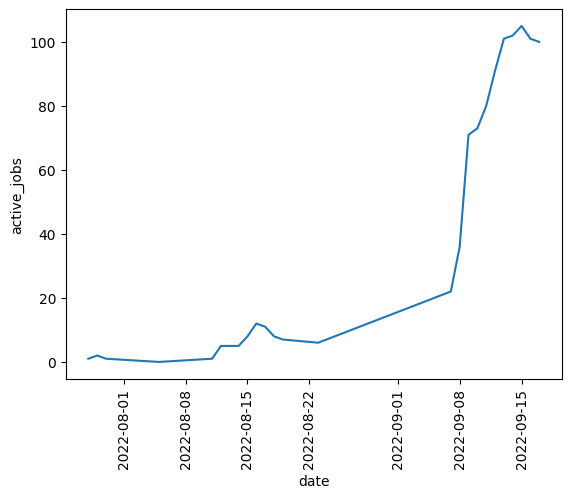

In [52]:
def sum_cum(df):
    df2=pd.DataFrame()
    df2['applied_jobs']=df['applied_count'].cumsum()
    df2['viewed_jobs']=df['viewed_count'].cumsum()
    df2['rejected_jobs']=df['rejected_count'].cumsum()
    df2['active_jobs']=df2['applied_jobs']-(df2['viewed_jobs']+df2['rejected_jobs'])
    print(df2)
    plot = sns.lineplot(x=df2.index, y="active_jobs", data=df2)
    plot.tick_params(axis='x', rotation=90)  
def Create_Charts():
    ...
    df2 = application_history
    normal_dates = lambda x: x.date()
    df2['date_applied']=pd.to_datetime(df2['date_applied'])

    df2['date_viewed']=pd.to_datetime(df2['date_viewed'])

    df2['date_rejected']=pd.to_datetime(df2['date_rejected'])
    # print(df2['date_viewed'])
    # print(df2.head())
    # df2['date_applied']=df2['date_applied'].as_datetime.dt.floor('d')
    
    # update_dates = df2['date_applied'].to_list()+df2['date_viewed'].to_list()+df2['date_rejected'].to_list()
    # update_dates = list(df2['date_applied'].unique())+list(df2['date_viewed'].unique())+list(df2['date_rejected'].unique())
    # print(update_dates)
    # update_dates=[item.date() for item in update_dates]
    # print(update_dates)
    # ts_df = pd.DataFrame(update_dates,columns=["date"]).dropna()
    # print(ts_df.dropna())
    # return 0
    # ts_df.merge(applied_count,)
    # applied_count=df2[['date_applied']].value_counts().rename_axis('date').reset_index('applied_count').sort_values('date')
    applied_count=pd.to_datetime(df2['date_applied']).dt.floor('d').value_counts().rename_axis('date').reset_index(name='applied_count').sort_values('date')
    viewed_count=pd.to_datetime(df2['date_viewed']).dt.floor('d').value_counts().rename_axis('date').reset_index(name='viewed_count').sort_values('date')
    rejected_count=pd.to_datetime(df2['date_rejected']).dt.floor('d').value_counts().rename_axis('date').reset_index(name='rejected_count').sort_values('date')
    
    #Pseudo-code for automatically labeling inactive applications as rejected
    #date_ghosted = max(date_applied, date_viewed) + 30 days if (!(rejected) and (closed) and (date.now()-max(date_applied, date_viewed) > 1 month)) else None
    
    applied_count['date'] = [item.date() for item in applied_count['date']]
    # viewed_count=df2[['date_viewed']].value_counts()
    # rejected_count=df2[['date_rejected']].value_counts()
    active_jobs = pd.concat([applied_count, viewed_count, rejected_count],join='outer')
    active_jobs['date']=pd.to_datetime(active_jobs['date']).dt.normalize()
    active_jobs = active_jobs.set_index('date').sort_index().groupby(level=0).sum()
    sum_cum(active_jobs)
    
    
    sectors_applied = df2['']
    # df2['viewed_count']=pd.to_datetime(df2['date_viewed']).dt.floor('d').value_counts()
    # print(df2['viewed_count'])
    return 0


    df2['date_rejected']=df2['date_rejected'].dt.floor('d')
    # applications_per_day = pd.to_datetime(df2['date_applied']).dt.floor('d').value_counts().rename_axis('date').reset_index(name='applied_count').sort_values('date') # Gives time series representation of applications per day
    update_dates = set(df2['date_applied'].to_list()+df2['date_viewed'].to_list()+df2['date_rejected'].to_list())

    df2
    update_dates
    plot = sns.barplot(x="date", y="applied_count", data=df2)
    plot.tick_params(axis='x', rotation=90)
Create_Charts()

In [95]:
targets = ['Website','Headquarters', 'Company size', 'Founded', 'Specialties']
def Parse_Info_Tags(entry):
    targets = ['Website','Headquarters', 'Industry', 'Company size', 'Founded', 'Specialties']
    try:
        if isinstance(entry['Info_Tags'],str):
            item = entry['Info_Tags'].replace("[","").replace("]","")
            item = item.split("', '")
            item = [entry.replace("\'","") for entry in item if isinstance(entry,str)]
        else:
            return {target:None for target in targets}
    except Exception as e:
        print(e, entry)
        return {None}
    # print(item, sep="\n")
    extra_data = {}
    for target in targets:
        if target in item:
            target_value = item[item.index(target)+1]
            
            # print(target, target_value)
            extra_data|={target:target_value}
    if 'Specialties' in extra_data:
        extra_data['Specialties']=[text.strip() for text in extra_data['Specialties'].replace(", and",",").split(',')]
    extra_data['Company_Name']=entry['Company_Name']
    return extra_data
    
    
    
    HQ_Index = item[item.index("Headquarters")+1] if item.index("Headquarters") else None
    Industry_Index = item[item.index("Industry")+1] if item.index("Industry") else None
    Specialties = item[item.index("Specialties")+1:] if item.index("Specialties") else None


def clean_company_info():
    modified_database_dict = [Parse_Info_Tags(item) for index,item in companies.iterrows()]
    company_features = pd.DataFrame(modified_database_dict)
    # company_features.head()
    company_info = pd.merge(companies, company_features, how='left', on="Company_Name").drop(["Unnamed: 0", "Info_Tags"], axis=1)
    #TODO encode Specialties with Prime List Compression
    return company_info



company_info=clean_company_info()
company_info.head()

,Company_Name,SourceID,errors,Ticker_Symbol,Company_Website,Overview,Locations,error_count,company_domain,Website,Headquarters,Company size,Founded,Specialties
0,Acl Digital,3183794383,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,https://www.acldigital.com/,ACL Digital is a design-led Digital Experience...,NaN,2,acldigital.com,https://www.acldigital.com/,"San Jose, California","1,001-5,000 employees",1992,"[Digital Experience, Product Innovation, Techn..."
1,"The Raymond Newell Group, Inc.",3172677327,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,https://www.raymondnewell.com/,"The Raymond Newell Group, Inc. is an executive...",NaN,2,raymondnewell.com,https://www.raymondnewell.com/,"Atlanta, Georgia",2-10 employees,NaN,"[Recruiting, Executive Recruiting, Executive S..."
2,Eclaro,3254118672,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,http://www.eclaro.com,Eclaro is an award-winning professional servic...,NaN,2,eclaro.com,http://www.eclaro.com,"New York, NY","1,001-5,000 employees",1999,[Customized solutions for Human Capital and Ta...
3,Cybercoders,3243309366,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,http://www.cybercoders.com/,"CyberCoders, a division of ASGN Incorporated, ...",NaN,2,cybercoders.com,http://www.cybercoders.com,"Irvine, CA",201-500 employees,1999,"[IT, Engineering, Sales, Executive, Technical,..."
4,Cybercoders,3243309366,"{'Ticker_Symbol': AttributeError(""'NoneType' o...",NaN,http://www.cybercoders.com/,"CyberCoders, a division of ASGN Incorporated, ...",NaN,2,cybercoders.com,http://www.cybercoders.com,"Irvine, CA",201-500 employees,1999,"[IT, Engineering, Sales, Executive, Technical,..."


In [74]:
type(companies['Info_Tags'].iloc[0])

str

In [ ]:
application_history

,PostID,position,company,Company_Name,Location,Workplace_Type,Premium-Salary,Premium-Skills,Premium-Skills_Possessed,date_applied,date_viewed,date_rejected,Closed
0,3183794383,Automation Engineer,Acl Digital,ACL Digital,NaN,On-site,NaN,"['SQL', 'Python (Programming Language)', 'Micr...",3.0,2022-09-09 01:04:36+00:00,NaT,NaT,True
1,3172677327,Automation Engineer,"The Raymond Newell Group, Inc","The Raymond Newell Group, Inc.",NaN,On-site,"['$115,000/yr - $145,000/yr', 'Employer-provid...","['Microsoft Office', 'Engineering', 'Microsoft...",4.0,2022-09-09 01:10:37+00:00,2022-09-11 01:19:01+00:00,NaT,True
2,3254118672,Back End Developer,Eclaro,Eclaro,NaN,Remote,NaN,"['Python (Programming Language)', 'SQL', 'Java...",2.0,2022-09-09 22:30:43+00:00,NaT,NaT,True
3,3243309366,Backend Engineer- Remote,Cybercoders,CyberCoders,NaN,Remote,"['$100,000/yr - $130,000/yr', 'Employer-provid...","['Python (Programming Language)', 'SQL', 'Micr...",4.0,2022-09-07 23:43:15+00:00,NaT,NaT,True
4,3199936269,BI Analyst - Security and Privacy,Cypress Hcm,Cypress HCM,NaN,Remote,NaN,"['Microsoft Excel', 'SQL', 'Microsoft Office',...",9.0,2022-09-09 22:28:42+00:00,NaT,NaT,True
5,3258976823,BI/Tableau Analyst,The Judge Group,The Judge Group,NaN,Remote,NaN,"['SQL', 'Microsoft Excel', 'Data Analysis', 'M...",7.0,2022-09-09 01:14:02+00:00,NaT,NaT,True
6,3262568756,Blockchain & NFT Developer (Web3/API),Thentic,Thentic,NaN,Remote,NaN,"['Python (Programming Language)', 'Smart Contr...",2.0,2022-09-12 00:56:19+00:00,2022-09-12 11:05:25+00:00,NaT,True
7,3268327570,Business Analyst,Energy Mill Shipley,NaN,NaN,NaN,NaN,[],NaN,2022-09-13 18:33:05+00:00,NaT,NaT,NaN
8,3264574624,Business Analyst,"Optimal Engineering, Inc","Optimal Engineering, Inc.",NaN,Remote,"['$75,000/yr - $80,000/yr', 'Employer-provided']","['Microsoft Excel', 'Microsoft Office', 'Leade...",7.0,2022-09-12 22:47:37+00:00,NaT,NaT,True
9,3266269827,Business Analyst Consultant - Blockchain Backg...,Jcw,JCW,NaN,Remote,NaN,"['Microsoft Excel', 'Microsoft Office', 'Leade...",8.0,2022-09-14 21:36:22+00:00,NaT,NaT,True


In [57]:
import sqlalchemy
def export_db(db, table, table_name):
    # create my-sqlite.db in the current directory using sqlalchemy
    import_df = application_history
    import_df = table

    db = sqlalchemy.create_engine(db) 
    import_df.to_sql(table_name, con=db)

# db.to_sql('timeseries', application_history, if_exists="replace")

In [94]:
companies

export_db(db='sqlite:///app_trak.db', table=application_history, table_name="application_history")
export_db(db='sqlite:///app_trak.db', table=companies, table_name="company_info")

In [3]:
'''
A categorical-list compression/encryption algorithm I thought up to (hopefully) reduce space complexity at the expense of time complexity. 

Let L be an ordered collection of unique elements, with its size |L|=n, an arbitrary natural number.
Let f be an injective function from L to P, the set of primes, such that: 
    f: L_i --> P_i, the ith prime number
    f': P_i --> L_i 
Let M be a random subset of L, where:
    0<=|M|<=10
Let g be a function defined as:
    g: M-->\N
    g(M) = prod([f(m) for each m in M])
Since g(M) is a product of primes, then, by the fundamental theorem of arithmetic, its factors are unique.
Therefore, 
    g'(M) = [f'(i) for i in factors(g(M))]
    
My concerns for this algorithm is that as |L| grows large, the worst-case factorization time complexity grows with it.
In some respects, so long as |L| and |M| are relatively small, but the typical string representation of M is large, then it can make sense to compress the list/string into an integer or hexadecimal format.
That being said, this algorithm might not be necessary for this code, but it was fun to create.

Alternative version may include binary representation of options then encoded into hex, but we'll see.



'''


def Parse_Skills():
    total_skills=application_history['Premium-Skills'].to_list()
    number_of_skills=[int(count) if str(count).lower()!="nan" else 0 for count in application_history['Premium-Skills_Possessed']]
    owned = []
    missing = []
    print(len(total_skills), len(number_of_skills))
    for skills, quantity in zip(total_skills, number_of_skills):
        
        skills = skills.strip("[").strip("]").split(",")
        print("Owned: ",quantity,skills[:quantity])
        print("Not owned: ",skills[quantity:])
        owned_skills = skills[:(quantity)]
        missing_skills = skills[(quantity):]
        owned+=owned_skills
        missing+=missing_skills
    owned_skills = [skill.replace(r"'","").strip() for skill in owned]
    missing_skills = [skill.replace(r"'","").strip() for skill in missing]
    print("Owned Skills", set(owned_skills), "\n")
    print("Missing Skills", set(missing_skills))
    return owned_skills,missing_skills

@cache
def generate_primes():
    iter = 1
    @cache
    def next_prime(n):
        #gets nth prime
        global set_primes
        new_prime = -1 #TODO get actual prime generating function.
        primes.append(new_prime)
        set_primes = set(primes)
        yield new_prime
    while 1:
        iter+=1
        result = int(primes[(iter-1)] if (iter-1)<=len(primes) else next_prime(iter))
        yield result

@cache
def factorize(input_number):
    @cache
    def prime_sieve(value):
        for prime in filter(lambda x: x>max(factors), primes):
            if input_number not in set_primes:
                if input_number%prime==0:
                    print("FACTOR: ", prime)
                    return prime
            else:
                print("INPUT IS PRIME", input_number)
                return input_number
    factors = [1]
    while input_number not in primes and input_number!=1:
        input_number = input_number//max(factors)
        factor = prime_sieve(input_number)
        factors.append(factor)
        print("INPUT", input_number,"FACTOR: ", factor)
        
    return factors[1:] #removing our seeded 1 value

@cache
def load_skills(skill_name):
    if skill_name in transformed_skills.keys():
        skill_ID = transformed_skills[skill_name]
    else:
        skill_ID = generate_primes()
        transformed_skills.update({skill_name:skill_ID})
        revert_skills.update({skill_ID:skill_name})
    return skill_ID

def prod(input_list):
    prod = 1
    for item in input_list:
        prod*=int(item)
    return prod


def encode_skills(skill_list):
    if isinstance(skill_list,str):
        cleaned_string = skill_list.replace("[","").replace("]","").replace("'","").replace(", ",",")
        # print("Clean", cleaned_string)
        skill_list = cleaned_string.split(",")
        # print("List", skill_list, len(skill_list))
    if isinstance(skill_list, list):
        # print([load_skills(skill_name) for skill_name in skill_list])
        # return np.prod([load_skills(skill_name) for skill_name in skill_list])
        # print(skill_list)
        result = [int(transformed_skills[skill]) for skill in skill_list]
        print("Converted Skill list:", result)
        result_int = prod(result)
        # print(result_int)
        return result_int
    else:
        return 0

def decode_skills(composite_number):
    factors = factorize(composite_number)
    skill_list = [revert_skills[factor] for factor in factors]
    return skill_list


owned,missing = Parse_Skills()
all_skills = set(owned)|set(missing)
primes = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997,1009,1013,1019,1021,1031,1033,1039,1049,1051,1061,1063,1069,1087,1091,1093,1097,1103,1109,1117,1123,1129,1151,1153,1163,1171,1181,1187,1193,1201,1213,1217,1223,1229,1231,1237,1249,1259,1277,1279,1283,1289,1291,1297,1301,1303,1307,1319,1321,1327,1361,1367,1373,1381,1399,1409,1423,1427,1429,1433,1439,1447,1451,1453,1459,1471,1481,1483,1487,1489,1493,1499,1511,1523,1531,1543,1549,1553,1559,1567,1571,1579,1583,1597,1601,1607,1609,1613,1619,1621,1627,1637,1657,1663,1667,1669,1693,1697,1699,1709,1721,1723,1733,1741,1747,1753,1759,1777,1783,1787,1789,1801,1811,1823,1831,1847,1861,1867,1871,1873,1877,1879,1889,1901,1907,1913,1931,1933,1949,1951,1973,1979,1987,1993,1997,1999,2003,2011,2017,2027,2029,2039,2053,2063,2069,2081,2083,2087,2089,2099,2111,2113,2129,2131,2137,2141,2143,2153,2161,2179,2203,2207,2213,2221,2237,2239,2243,2251,2267,2269,2273,2281,2287,2293,2297,2309,2311,2333,2339,2341,2347,2351,2357,2371,2377,2381,2383,2389,2393,2399,2411,2417,2423,2437,2441,2447,2459,2467,2473,2477,2503,2521,2531,2539,2543,2549,2551,2557,2579,2591,2593,2609,2617,2621,2633,2647,2657,2659,2663,2671,2677,2683,2687,2689,2693,2699,2707,2711,2713,2719,2729,2731,2741,2749,2753,2767,2777,2789,2791,2797,2801,2803,2819,2833,2837,2843,2851,2857,2861,2879,2887,2897,2903,2909,2917,2927,2939,2953,2957,2963,2969,2971,2999,3001,3011,3019,3023,3037,3041,3049,3061,3067,3079,3083,3089,3109,3119,3121,3137,3163,3167,3169,3181,3187,3191,3203,3209,3217,3221,3229,3251,3253,3257,3259,3271,3299,3301,3307,3313,3319,3323,3329,3331,3343,3347,3359,3361,3371,3373,3389,3391,3407,3413,3433,3449,3457,3461,3463,3467,3469,3491,3499,3511,3517,3527,3529,3533,3539,3541,3547,3557,3559,3571,3581,3583,3593,3607,3613,3617,3623,3631,3637,3643,3659,3671,3673,3677,3691,3697,3701,3709,3719,3727,3733,3739,3761,3767,3769,3779,3793,3797,3803,3821,3823,3833,3847,3851,3853,3863,3877,3881,3889,3907,3911,3917,3919,3923,3929,3931,3943,3947,3967,3989,4001,4003,4007,4013,4019,4021,4027,4049,4051,4057,4073,4079,4091,4093,4099,4111,4127,4129,4133,4139,4153,4157,4159,4177,4201,4211,4217,4219,4229,4231,4241,4243,4253,4259,4261,4271,4273,4283,4289,4297,4327,4337,4339,4349,4357,4363,4373,4391]
set_primes = set(primes)
transformed_skills = {skill_name:prime for skill_name, prime in zip(all_skills, generate_primes())}
revert_skills = {value:skill_name for skill_name,value in transformed_skills.items()}


NameError: name 'cache' is not defined

In [ ]:
transformed_skills

{'': 3,
 'C++': 5,
 'PLC Programming': 7,
 'AutoCAD': 11,
 'HTML': 13,
 'Project Management': 17,
 'Supply Chain Management': 19,
 'Blockchain': 23,
 'web3.js': 29,
 'Marketing': 31,
 'Postman API': 37,
 'React.js': 41,
 'Business Analysis': 43,
 'Manual Testing': 47,
 'Management': 53,
 'Cisco Systems Products': 59,
 'MySQL': 61,
 'JavaScript': 67,
 'Leadership': 71,
 'Jira': 73,
 'Microsoft SQL Server': 79,
 'Selenium': 83,
 'Internet Protocol Suite (TCP/IP)': 89,
 'SQL': 97,
 'Tableau': 101,
 'GitHub': 103,
 'Virtual Private Network (VPN)': 107,
 'Linux': 109,
 'Microsoft Power BI': 113,
 'Engineering': 127,
 'Accounting': 131,
 'Customer Service': 137,
 'Financial Analysis': 139,
 'Jenkins': 149,
 'Electrical Engineering': 151,
 'Research': 157,
 'Business Intelligence (BI)': 163,
 'R (Programming Language)': 167,
 'Agile Methodologies': 173,
 'Intelligence Analysis': 179,
 'Cascading Style Sheets (CSS)': 181,
 'Microsoft Office': 191,
 'Digital Marketing': 193,
 'Finance': 197,
 '

In [ ]:
for i in generate_primes():
    print(i)
    if i >300:
        break

479


In [ ]:
test_entry = application_history.iloc[0]['Premium-Skills']
print("Test Entry: ", test_entry)
print("Entry is string: ", isinstance(test_entry,str))
test_result = encode_skills(test_entry)
print("Test Result: ", test_result)
decode_test = decode_skills(test_result)
print("Decode Result: ", sorted(decode_test))
print("Compare MePlz: ", sorted(test_entry.replace("[","").replace("]","").replace("'","").replace(", ",",").split(",")))



Test Entry:  ['SQL', 'Python (Programming Language)', 'Microsoft Office', 'Java', 'Agile Methodologies', 'Manual Testing', 'JavaScript', 'Jira', 'Jenkins', 'Git']
Entry is string:  True
Converted Skill list: [97, 283, 191, 211, 173, 47, 67, 73, 149, 431]
Test Result:  2825394886299979416149
FACTOR:  47
INPUT 2825394886299979416149 FACTOR:  47
FACTOR:  67
INPUT 60114784814893179067 FACTOR:  67
FACTOR:  73
INPUT 897235594252137001 FACTOR:  73
FACTOR:  97
INPUT 12290898551399137 FACTOR:  97
FACTOR:  149
INPUT 126710294344321 FACTOR:  149
FACTOR:  173
INPUT 850404660029 FACTOR:  173
FACTOR:  191
INPUT 4915633873 FACTOR:  191
FACTOR:  211
INPUT 25736303 FACTOR:  211
FACTOR:  283
INPUT 121973 FACTOR:  283
INPUT IS PRIME 431
INPUT 431 FACTOR:  431
Decode Result:  ['Agile Methodologies', 'Git', 'Java', 'JavaScript', 'Jenkins', 'Jira', 'Manual Testing', 'Microsoft Office', 'Python (Programming Language)', 'SQL']
Compare MePlz:  ['Agile Methodologies', 'Git', 'Java', 'JavaScript', 'Jenkins', 'Ji

97
27451
5243141
1106302751
191390375923
8995347668381
602688293781527
43996245446051471
6555440571461669179
2825394886299979416149
